In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

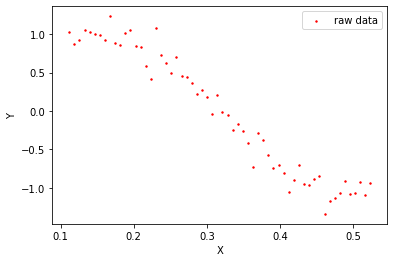

In [34]:
df = pd.read_csv("lasso_data.csv");
data = df.values;
X = data[:,0];
Y = data[:,1];

plt.figure();
plt.scatter(X,Y,s = 2, c = "r", label = "raw data");
plt.xlabel("X");
plt.ylabel("Y");
plt.legend();
plt.show();

In [96]:
def getPoly(X,order):
    order += 1;
    X_poly = np.zeros((len(X),order))
    for i in range(order):
        X_poly[:,i] = X**(order-1 - i);
        
    return X_poly;

In [97]:
def getWeight(X_poly, Y):
    w = np.linalg.pinv(X_poly.T.dot(X_poly) ).dot(X_poly.T).dot(Y);
    return w;

def Ridge_Regression(X_poly, Y, lamb):
    w = np.linalg.pinv(X_poly.T.dot(X_poly) + lamb ).dot(X_poly.T).dot(Y);
    return w;

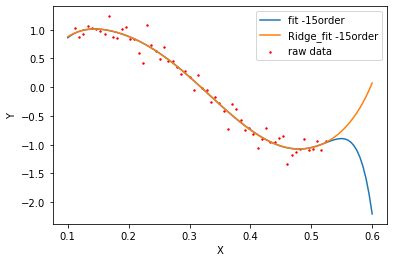

In [98]:
end = 5;
X = data[:,0];
Y = data[:,1];

Np = 100;
#X_plot = np.array(range(Np))/(Np-1) * (np.max(X)-np.min(X)) + np.min(X);
X_plot = np.array(range(Np))/(Np-1)*0.5 + 0.1;

order = np.array([15]);
Y_fit = np.zeros((len(X_plot),len(order)));
Y_fit_Ridge = np.zeros((len(X_plot),len(order)));

for i in range(len(order)):
    X_poly = getPoly(X, order[i]);
    w = getWeight(X_poly,Y);
    
    w_RR = Ridge_Regression(X_poly,Y, 1e-11);
    
    X_plot_poly = getPoly(X_plot, order[i]);
    Y_fit[:,i] = X_plot_poly.dot(w);
    Y_fit_Ridge[:,i] = X_plot_poly.dot(w_RR);

plt.figure();
plt.scatter(X,Y,s = 2, c = "r", label = "raw data");
for i in range(len(order)):
    plt.plot(X_plot, Y_fit[:,i], label = "fit -" + str(order[i]) + "order");
    plt.plot(X_plot, Y_fit_Ridge[:,i], label = "Ridge_fit -" + str(order[i]) + "order");
    
plt.xlabel("X");
plt.ylabel("Y");
plt.legend();
plt.show();

In [99]:
w

array([-1.75415288e+04, -1.76182294e+04, -1.37807208e+04, -5.16588783e+03,
        6.65863794e+03,  1.59101859e+04,  1.37350905e+04, -3.40768310e+03,
       -1.97016261e+04, -4.56161612e+03,  2.58869148e+04, -1.84389672e+04,
        6.20673721e+03, -1.16000154e+03,  1.15443659e+02, -3.69845564e+00])

In [101]:
w_RR

array([-3.60262121e+03, -1.62341355e+03,  5.17261321e+02,  2.34853092e+03,
        3.13819248e+03,  2.16113697e+03, -5.82850893e+02, -3.38180278e+03,
       -2.88398694e+03,  2.14763888e+03,  4.27346559e+03, -4.73894278e+03,
        2.00859768e+03, -4.67367170e+02,  5.65804343e+01, -1.68428489e+00])